<a href="https://colab.research.google.com/github/wagnerde/Diaz2019/blob/master/ISCC_Shivdasani2022_pp2_220708_sample5_WangSInt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISCC Shivdasani 2022: Analysis
Analyze cNMF spectra calculated for: <br>
**sample5-WantSInt** <br>

This notebook analyzes a cNMF run performed on 220705


## Environment Setup (220614)
Install software from pip, apt, and Github.  Load modules, configure workspace settings.

In [ ]:
# Environment Setup: verified working on 220614

# print python version to screen
!python --version

# pip install software
!pip install -q scanpy==1.8.2 bbknn==1.5.1 leidenalg==0.8.10 scrublet==0.2.3 wget==3.2 
!pip install -q pyyaml==5.3.1 fastcluster==1.1.26 cnmf==1.3.2

# apt-get install software
!sudo apt-get install -qq lftp

# import python packages
import os, sys, wget, pickle
import bbknn
import scrublet as scr
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import helper functions from Github
if not os.path.exists('scTools-py'): 
  !git clone https://github.com/wagnerde/scTools-py.git
sys.path.append('scTools-py/')
import scTools_dew as dew

Python 3.7.13
     |████████████████████████████████| 2.0 MB 11.7 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 96 kB 3.1 MB/s 
     |████████████████████████████████| 646 kB 46.4 MB/s 
     |████████████████████████████████| 1.1 MB 67.2 MB/s 
     |████████████████████████████████| 3.1 MB 49.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 269 kB 14.0 MB/s 
     |████████████████████████████████| 155 kB 68.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

## Download Preprocessed Data from Box

In [ ]:
# wget files from static Box link 
!wget -q --show-progress https://ucsf.box.com/shared/static/ocpr9sfmh17lzh5ydagnorfrkhnhbcny.h5ad -O WangSIntCounts_raw.220701.h5ad
!wget -q --show-progress https://ucsf.box.com/shared/static/rp9lciy3ffitbegylhwh6gb51xc01jch.gz -O WangSIntCounts.220701.h5ad.cNMF.tar.gz
!tar -xzf WangSIntCounts.220701.h5ad.cNMF.tar.gz

WangSIntCounts_raw. 100%[===================>] 246.98M  25.5MB/s    in 10s     
WangSIntCounts.2207 100%[===================>] 652.35M  25.3MB/s    in 37s     


In [ ]:
# move cNMF output back to its "normal" location
!mv /content/content/cNMF-output/ /content/

In [ ]:
# cNMF settings (modify as needed)
cNMF_n_iter = 100 
cNMF_n_var_genes = 2000 
cNMF_output_dir = './cNMF-output'
cNMF_run_name = 'Shiv2022-WangSInt-cNMF'
cNMF_k_range = [12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
cNMF_rand_seed = 14 
cNMF_input_data = 'WangSIntCounts_raw.220701.h5ad' 

In [ ]:
from cnmf import cNMF
cnmf_obj = cNMF(output_dir=cNMF_output_dir, name=cNMF_run_name)

/usr/local/lib/python3.7/dist-packages/cnmf/cnmf.py:700: RuntimeWarning: invalid value encountered in true_divide
  norm_tpm = (np.array(tpm.X.todense()) - tpm_stats['__mean'].values) / tpm_stats['__std'].values


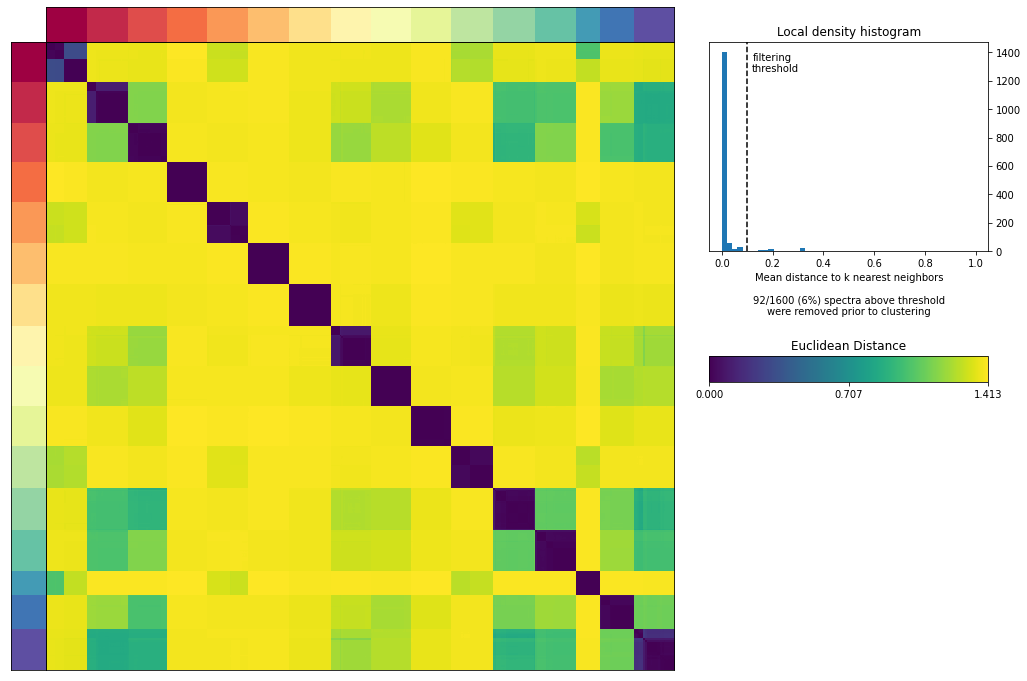

In [ ]:
# Choose consensus parameters (modify as needed)
cNMF_k = 16
cNMF_density_thresh = 0.1
cNMF_local_neighborhood_size = 0.3

# Run Consensus 
cnmf_obj.consensus(k=cNMF_k, density_threshold=cNMF_density_thresh, local_neighborhood_size=cNMF_local_neighborhood_size)

## Upload Results to BOX (cNMF w/ consensus)

In [ ]:
# Create a folder containing the h5ad and cNMF results
!mkdir -p upload_to_Box
!tar -czf /content/upload_to_Box/WangSIntCounts.220701.h5ad.cNMF.tar.gz /content/cNMF-output/

In [ ]:
# Prepare LFTP shell command
local_dir = '/content/upload_to_Box/'
remote_box_dir = '/Box_Home/WAGNER_LAB_SHARED/Dan_Wagner/ANALYSES/Shivdasani2022/220701_sample5-WangSInt/'
box_username = 'XXX,XXX' 

lftp_cmd = 'lftp -e "mirror -R %s %s; bye" -u %s ftps://ftp.box.com' % (local_dir, remote_box_dir, box_username)

# Execute shell command
print('Executing:\n %s' % (lftp_cmd))
! {lftp_cmd}